In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get and check out Dataset

In [66]:
dataset = pd.read_csv("energy_efficiency_data.csv")
X = dataset.iloc[:, :-2].values
y = dataset.loc[:,'Heating_Load':'Cooling_Load'].values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [21]:
dataset.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


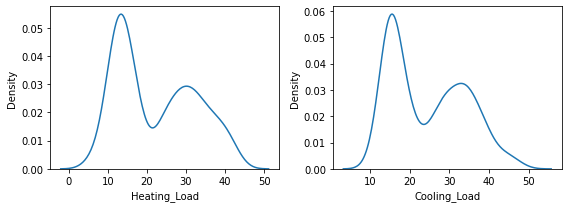

In [58]:
f, axs = plt.subplots(1, 2, figsize=(8,3))
sns.kdeplot(data=dataset["Heating_Load"], ax = axs[0])
sns.kdeplot(data=dataset["Cooling_Load"], ax = axs[1])
f.tight_layout()

<AxesSubplot:xlabel='Overall_Height', ylabel='Heating_Load'>

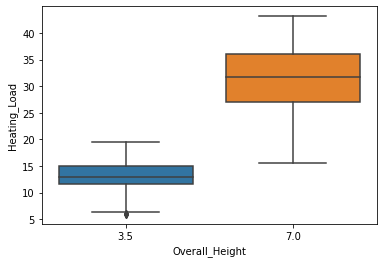

In [67]:
sns.boxplot(data=dataset, y="Heating_Load", x = "Overall_Height")

In [69]:
dataset.isnull()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False,False


Since there isn't any missing data, we won't need Imputer

Since there isn't any categorial data we won't need an Encoder

# Splitting the dataset into the Training set and Test set

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 1)

In [71]:
X_train

array([[6.600e-01, 7.595e+02, 3.185e+02, ..., 5.000e+00, 4.000e-01,
        3.000e+00],
       [6.400e-01, 7.840e+02, 3.430e+02, ..., 2.000e+00, 4.000e-01,
        4.000e+00],
       [7.900e-01, 6.370e+02, 3.430e+02, ..., 3.000e+00, 1.000e-01,
        3.000e+00],
       ...,
       [7.400e-01, 6.860e+02, 2.450e+02, ..., 2.000e+00, 1.000e-01,
        1.000e+00],
       [6.400e-01, 7.840e+02, 3.430e+02, ..., 5.000e+00, 1.000e-01,
        4.000e+00],
       [6.600e-01, 7.595e+02, 3.185e+02, ..., 3.000e+00, 0.000e+00,
        0.000e+00]])

In [73]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, :] = sc.fit_transform(X_train[:, :])
X_test[:, :] = sc.transform(X_test[:, :])